In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
#Create the inspector and connect it to the engine
inspector = inspect(engine)

# Inspect columns and data types for 'measurement' table
columns= inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# Inspect columns and data types for 'measurement' table
columns= inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Assign the measurement class to a variable called measurement
Measurement = Base.classes.measurement

# Assign the station class to a variable called station
Station= Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
from sqlalchemy import desc

most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(most_recent_date)

('2017-08-23',)


In [41]:
#Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.
from dateutil import parser, relativedelta

# Parse the end date into a datetime object
end_date = parser.parse('2017-08-23')

# Calculate the start date by subtracting 12 months from the end date
start_date = end_date - relativedelta.relativedelta(months=12)

# Query using the calculated start and end dates
precipitations = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

# Create a list of tuples containing the precipitation and date data
precip_data = [(precipitation.prcp, precipitation.date) for precipitation in precipitations]

# Print the results
for precipitation in precipitations:
    print(f"Precipitation: {precipitation}")

Precipitation: (0.08, '2016-08-24')
Precipitation: (0.08, '2016-08-25')
Precipitation: (0.0, '2016-08-26')
Precipitation: (0.0, '2016-08-27')
Precipitation: (0.01, '2016-08-28')
Precipitation: (0.0, '2016-08-29')
Precipitation: (0.0, '2016-08-30')
Precipitation: (0.13, '2016-08-31')
Precipitation: (0.0, '2016-09-01')
Precipitation: (0.0, '2016-09-02')
Precipitation: (0.0, '2016-09-03')
Precipitation: (0.03, '2016-09-04')
Precipitation: (None, '2016-09-05')
Precipitation: (None, '2016-09-06')
Precipitation: (0.05, '2016-09-07')
Precipitation: (0.0, '2016-09-08')
Precipitation: (0.03, '2016-09-09')
Precipitation: (0.0, '2016-09-10')
Precipitation: (0.05, '2016-09-11')
Precipitation: (0.0, '2016-09-12')
Precipitation: (0.02, '2016-09-13')
Precipitation: (1.32, '2016-09-14')
Precipitation: (0.42, '2016-09-15')
Precipitation: (0.06, '2016-09-16')
Precipitation: (0.05, '2016-09-17')
Precipitation: (0.0, '2016-09-18')
Precipitation: (0.0, '2016-09-19')
Precipitation: (0.0, '2016-09-20')
Preci

In [47]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names.
precip_df = pd.DataFrame(precip_data, columns=['Precipitation', 'Date'])

# Sort the dataframe by date
precip_df= precip_df.sort_values(by='Date')
precip_df

,Precipitation,Date
0,0.08,2016-08-24
1006,NaN,2016-08-24
1524,2.15,2016-08-24
702,2.28,2016-08-24
360,2.15,2016-08-24
...,...,...
1522,0.00,2017-08-22
1523,0.08,2017-08-23
359,0.00,2017-08-23
1005,0.00,2017-08-23


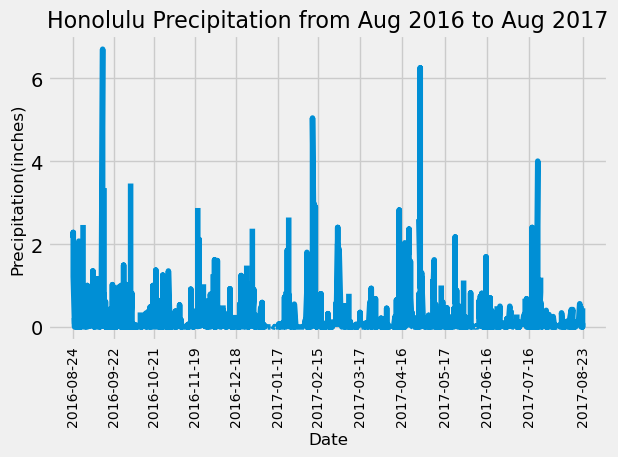

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precip_df['Date'], precip_df['Precipitation'])
plt.xlabel('Date', fontsize=12)

#Format x axis so only 12 dates
n= len(precip_df)//12
plt.xticks(precip_df['Date'][::n], rotation=90, fontsize=10)

#Insert labels for y axis and title
plt.ylabel('Precipitation(inches)', fontsize=12)
plt.title('Honolulu Precipitation from Aug 2016 to Aug 2017', fontsize=16)
plt.tight_layout()
plt.show()

In [70]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precip_df.describe()
summary_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()